## 캐글 데이터셋

In [11]:
## 파일 경로
## 문장
# file_path_train_hate = "/content/drive/MyDrive/공부/자연어 처리/자료/korean-hate-speech-detection/train.hate.csv"
# file_path_dev_hate = "/content/drive/MyDrive/공부/자연어 처리/자료/korean-hate-speech-detection/dev.hate.csv"
# file_path_unlabeled_comments = "/content/drive/MyDrive/공부/자연어 처리/자료/korean-hate-speech-detection/unlabeled_comments.txt"
# file_path_no_hate = "/content/drive/MyDrive/공부/자연어 처리/자료/korean-hate-speech-detection/test.hate.no_label.csv"
# file_path_kold_v1 = "/content/drive/MyDrive/공부/자연어 처리/자료/kold_v1.json"
# file_path_youtube_comments = "/content/drive/MyDrive/공부/자연어 처리/자료/comments_update_df.csv"
# file_path_trip = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/tripadviser_review.csv"
# file_path_drama = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/Dataset.csv"
# file_path_common = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/common_word.csv"

# ## 단어
# file_path_pos_word = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/pos_word.csv"
# file_path_neg_word = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/neg_word.csv"
# file_path_unknown = "/content/drive/MyDrive/공부/자연어 처리/자료/KnuSentiLex/obj_unknown_pol_word.txt"
# file_path_senti_dict = "/content/drive/MyDrive/공부/자연어 처리/자료/KnuSentiLex/SentiWord_Dict.txt"
# file_path_stopwords = "C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/1차시도/stopwords.txt"

file_path_change_label = './데이터/changed_label.csv'
file_path_stopwords = './데이터/불용어사전.txt'

In [12]:
"""
[문장]
df_train_hate : 
 - label 있음.
 - none         3486
 - offensive    2499
 - hate         1911


df_dev_hate :
 - label 있음.
 - offensive    189
 - none         160
 - hate         122


df_unlabeled_comments : label 없음
df_no_hate : label 없음
df_kold_v1 : label 없음
df_youtube_comments : label 없음,  좋아요 수 있음


[단어]
pos_word.csv
neg_word.csv
obj_unknown_pol_word.txt
SentiWord_Dict.txt
"""

import pandas as pd
import numpy as np


## 문장
# df_train_hate = pd.read_csv(file_path_train_hate, encoding='utf-8', engine='python')
# df_dev_hate = pd.read_csv(file_path_dev_hate, encoding='utf-8', engine='python')
# df_unlabeled_comments = pd.read_table(file_path_unlabeled_comments, encoding='utf-8', engine='python', names=['comment'],)
# df_no_hate = pd.read_csv(file_path_no_hate, encoding='utf-8', engine='python')
# df_kold_v1 = pd.read_json(file_path_kold_v1, encoding='utf-8')
# df_youtube_comments = pd.read_csv(file_path_youtube_comments, encoding='utf-8', engine='python')
# df_trip = pd.read_csv(file_path_trip, encoding='utf-8', engine='python')
# df_kdrama_common = pd.read_csv(file_path_common, encoding='utf-8', engine='python',)


## 단어
# df_pos_word = pd.read_csv(file_path_pos_word, encoding='utf-8', engine='python')
# df_neg_word = pd.read_csv(file_path_neg_word, encoding='utf-8', engine='python')
# df_unknown_word = pd.read_table(file_path_unknown, encoding='utf-8', engine='python', names=['word'])
new_df = pd.read_csv(file_path_change_label, encoding='utf-8', engine='python')
new_df

,text,y
0,여행에 집중할수 있게 편안한 휴식을 제공하는 호텔이었습니다. 위치선정 또한 적당한 ...,3
1,"2일 이상 연박시 침대, 이불, 베게등 침구류 교체 및 어메니티 보강이 필요해 보입...",3
2,지인에소개로온 호텔 깨끗하고 좋은거같아요 처음에는 없는게 많아 많이 당황했는데 ...,3
3,방에 딱 들어서자마자 눈이 휘둥그레질정도로 이렇게 넓은 호텔 처음 와본 것 같아요!...,3
4,저녁에 맥주한잔 하는게 좋아서 렌트 안하고 뚜벅이 하기로 했는데 호텔 바로 앞에 버...,3
...,...,...
16159,안정감,3
16160,적극적이다,3
16161,승리,3
16162,승리하다,3


## 자연어 처리 시작

### 자연어 처리 모듈 임포트

In [15]:
import Preprocessing as prep
import Visualization as vis

In [16]:
stopwords_list = ['제주도', '호스텔', '위치', '대중교통', '타고', '어디', '공항', '잠깐', '직원', '택시', '상품',]
stopwords_list = prep.stopwords(file_path_stopwords, stopwords_list)

In [17]:
prep.text_cleaning(new_df.text[5400], stopwords_list)

['어쩌면', '이다해', '승리', '승리']

### 문서-단어 행렬 생성

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer= lambda x: prep.text_cleaning(x, stopwords_list))
bow_vect = vect.fit_transform(new_df['text'].tolist())

In [19]:
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)
count_list

array([ 5,  1, 15, ...,  1,  1,  1], dtype=int64)

In [39]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 5,
 '가가린': 1,
 '가게': 15,
 '가격': 262,
 '가격표': 1,
 '가관': 2,
 '가구': 12,
 '가급': 1,
 '가기': 23,
 '가까이': 24,
 '가끔': 10,
 '가나': 4,
 '가난': 5,
 '가난뱅이': 1,
 '가년': 1,
 '가능': 12,
 '가능성': 4,
 '가다가': 1,
 '가담': 1,
 '가당': 1,
 '가도': 8,
 '가동': 2,
 '가두': 1,
 '가드': 1,
 '가득': 5,
 '가든': 2,
 '가라': 6,
 '가락': 2,
 '가래': 2,
 '가량': 5,
 '가려움': 1,
 '가렴': 1,
 '가렵': 1,
 '가로': 7,
 '가로본능폰': 1,
 '가로세로': 3,
 '가로수길': 1,
 '가루': 2,
 '가르침': 3,
 '가마니': 1,
 '가면': 21,
 '가몬': 1,
 '가무': 1,
 '가문': 1,
 '가물': 1,
 '가뭄': 2,
 '가미': 1,
 '가방': 4,
 '가버': 1,
 '가보': 1,
 '가봉': 1,
 '가쁘': 8,
 '가쁜': 2,
 '가사': 5,
 '가성': 51,
 '가세': 9,
 '가소': 1,
 '가수': 29,
 '가스': 1,
 '가스레인지': 1,
 '가스렌지': 1,
 '가슴': 22,
 '가슴앓이': 2,
 '가시': 4,
 '가식': 2,
 '가신': 4,
 '가안': 1,
 '가야': 20,
 '가오': 1,
 '가옥': 1,
 '가요': 17,
 '가요무대': 1,
 '가요제': 1,
 '가용': 2,
 '가운데': 4,
 '가운데손가락': 1,
 '가위': 1,
 '가을': 5,
 '가인': 3,
 '가장': 55,
 '가점': 1,
 '가정': 14,
 '가정불화': 1,
 '가정사': 2,
 '가정식': 2,
 '가정폭력': 3,
 '가족': 137,
 '가족사': 1,
 '가족사진': 1,
 '가족영화': 2,
 '가즈': 11,
 '가지': 77,
 '가짐': 3,
 '가짓수':

### TF-IDF 생성

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
tfidf_vect = tfidf.fit_transform(bow_vect)
tfidf_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 단어 맵핑

In [41]:
invert_index_vectorizer = {v : k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer[2928]

'무궁무진'

In [42]:
vect.vocabulary_

{'여행': 5870,
 '집중': 8197,
 '휴식': 10086,
 '제공': 7680,
 '호텔': 9883,
 '선정': 4441,
 '청소': 8419,
 '청결': 8413,
 '상태': 4285,
 '침대': 8673,
 '이불': 6794,
 '침구': 8672,
 '교체': 821,
 '어메니티': 5652,
 '보강': 3608,
 '베스트': 3539,
 '웨스턴': 6447,
 '회원': 10025,
 '경우': 487,
 '객실': 299,
 '층수': 8635,
 '요청': 6274,
 '적극': 7441,
 '반영': 3288,
 '지인': 8087,
 '소개': 4594,
 '처음': 8367,
 '당황': 1838,
 '세면': 4546,
 '도구': 1994,
 '잠옷': 7290,
 '필수': 9439,
 '그것': 1000,
 '정도': 7594,
 '박만': 3221,
 '저녁': 7422,
 '맥주': 2691,
 '한잔': 9578,
 '렌트': 2382,
 '뚜벅': 2290,
 '버스': 3468,
 '정류': 7599,
 '도착': 2046,
 '가방': 47,
 '일찍': 7087,
 '정비': 7614,
 '방이': 3382,
 '입실': 7136,
 '업그레이드': 5747,
 '정말': 7604,
 '바다': 3183,
 '전망': 7484,
 '전일': 7516,
 '함덕': 9610,
 '대명': 1871,
 '콘도': 8799,
 '실내': 5198,
 '분위기': 3843,
 '손님': 4679,
 '가장': 79,
 '배치': 3428,
 '대해': 1933,
 '대응': 1898,
 '써비스': 5292,
 '조식': 7770,
 '부분': 3763,
 '신경': 5119,
 '아주': 5376,
 '특급': 9086,
 '트랜디': 9059,
 '고민': 557,
 '흔적': 10116,
 '여름': 5838,
 '수영장': 4788,
 '사용': 4142,
 '보고': 3612,
 '엄마':

### 모델링

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimators' : [100, 300, 500, 700, 1000, 1500, 2000, 3000],
    'max_depth' : [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split' : [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
    'max_features' : [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'bootstrap' : [True, False],
    'n_jobs' : [-1, 0, 1, 2 ,3, 4, 5, 6, 7, 8, 9, 10],
}



x_train, x_test, y_train, y_test = train_test_split(tfidf_vect, new_df['y'], shuffle=True, test_size=0.2, stratify=new_df.y, random_state=33)

grid = GridSearchCV(RandomForestClassifier(), params, cv=3, n_jobs=-1)

# model = RandomForestClassifier(random_state=33)
y_pred = grid.fit(x_train, y_train)
# ?RandomForestClassifier

In [27]:
accuracy_score(y_pred, y_test)

0.7200742344571606

In [28]:
None, 'micro', 'macro', 'weighted', 'samples'

(None, 'micro', 'macro', 'weighted', 'samples')

In [29]:
recall_score(y_pred, y_test, average='macro')

0.7435120405543785

In [30]:
precision_score(y_pred, y_test, average='macro')

0.7258267386778264

In [31]:
f1_score(y_pred, y_test, average='macro')

0.7099604003400316

In [32]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70      1398
           2       0.93      0.78      0.85      1230
           3       0.45      0.83      0.58       605

    accuracy                           0.72      3233
   macro avg       0.73      0.74      0.71      3233
weighted avg       0.78      0.72      0.73      3233



In [33]:
confusion_matrix(y_pred, y_test)

array([[866,  46, 486],
       [145, 959, 126],
       [ 73,  29, 503]], dtype=int64)

## YoutubeAPI 실습

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")               # 경고 메시지 무시
# warnings.filterwarnings(action='default')     # 경고 메시지 활성화

plt.rcParams['axes.unicode_minus'] = False      # Glyph 8722 오류 해결을 위한 설정
plt.rcParams["figure.figsize"] = (12, 9)        # 그림 크기 설정
plt.rc('font', family='Malgun Gothic')       # 한글 폰트 설정
sns.set_theme()                                 # Seaborn의 테마 자동 설정

In [3]:
from CrawlingModule import YoutubeBulider

def api_key():
    infile = open("C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/api_key.txt", 'r')
    key = infile.readline()
    return key
    

In [ ]:
# yotube_API를 이용한 인기 급상승 video_id 가져오기
# build = YoutubeBulider(api_key())
# most_pop_videos = build.get_videos(chart='UCQ2O-iftmnlfrBuNsUUTofQ')
# most_pop_videos

In [4]:
from CrawlingModule import YoutubeBulider

bulider = YoutubeBulider(api_key())

# Channel_id ㅇㄷ? [추가요망]


# 특정 채널의 동영상 100개만 가져오기
video_list = bulider.get_videoId_in_channel(channelId='UCZ0bi2aVJngKLwFTU5g_fLQ')

categoryId_list = bulider.get_categoryId_in_channel(videoId_list=video_list)

print(len(categoryId_list))
video_list

100


['ljP6X7gfNu8',
 'rxeo-arlQd0',
 'ZZfP4Si9nZk',
 'pIiv6jd3TDE',
 'DZ-q7Z730mc',
 'IAN-5KEO2Wo',
 'k96_lzExaCk',
 'boom2zV3qXI',
 'MeqISU8xNMs',
 '7CEt9gHqh2I',
 '0KNFV2-uFvc',
 'H6q7InrtNzk',
 'Xh25c5IPAcg',
 'rdIgXWL9PuI',
 '0Qtq7o6vLbg',
 'Hm6WHAQMJdo',
 'hWQ5imsk3Tc',
 '41KBYCaWk7o',
 '9tvjkFJghJA',
 'leXEuSs_-Lk',
 'VPuV2m_S0Gs',
 'k0QXTO0pdGE',
 'VmS8419wbCY',
 'K188Lexb2OY',
 'NxRTbRZDLfg',
 'IkLnfTyTGdQ',
 'z7dNSpOd0pw',
 'P1UmoQujgfY',
 'DLolSfWmEg0',
 '1Tq2Vb4wP7o',
 '4xYTafywOIQ',
 '3NvufqmGP-o',
 '_YL2bVRvyXI',
 '-i5WbkdmF1M',
 'i-UoNNQpRkQ',
 'xvWNHl3eaaY',
 'WRRwyhvaJlY',
 'zrN-ybe49lg',
 'TWrtdb5dFuo',
 'gqoWCzzcORg',
 '8JgkBFbO6oM',
 '0n8cLEDd8bM',
 'EWZGdQDsh7A',
 'GN73Q2xnwZw',
 'pgNC2d5Qxnw',
 '6uLofnzh3kk',
 'BNFVafiZ8cE',
 'pMrUQHSyQzs',
 '34opuHgvVr4',
 'D9o-_Op2bZc',
 '95dFtxdrno4',
 '0ruk5wnUdSc',
 'PdN3rxu_LNU',
 'PRc4H90RoeU',
 'T65PZXxD7tw',
 'qnK7XnHQyC0',
 'gcDYS2TDRMA',
 'gHXKc3K8pbw',
 'c2ZDfBA9dx0',
 'HJUq5NaDljc',
 'ZvHnbHOIerk',
 'qZRxPDygMgY',
 'SoR2Jm

In [5]:
categoryId_list

['20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '24',
 '24',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20']

In [25]:
import pandas as pd 

df = pd.DataFrame(
    {
        'video_id' : video_list, 
        'category_id' : categoryId_list,
        'category_name' : 'N',
    }
)
df.category_id = df.category_id.astype(int)


infile = open('../자료/category_id_value.txt', 'r').readlines()
category_key_value = {}

for line in infile:
    key_value_list = line.split(':')
    category_key_value[int(key_value_list[0])] = key_value_list[1][1:-2]

def invert_category_name(category_Id:int) -> str:
    return category_key_value[category_Id]

df.category_name = df.category_id.apply(invert_category_name)
df


,video_id,category_id,category_name
0,Ynwm92g2hxQ,20,Gamin
1,a4abVmaMj5A,20,Gamin
2,TUTMzIP_Mv0,20,Gamin
3,zrN-ybe49lg,20,Gamin
4,PuRqyxLxTTc,20,Gamin
...,...,...,...
95,u9zKB3s-R1A,20,Gamin
96,De0mePZH0rI,20,Gamin
97,Bb43QlfkCAE,20,Gamin
98,wEa_8r0R3P8,20,Gamin


In [21]:
df.category_name.value_counts()

Gamin             99
News & Politic     1
Name: category_name, dtype: int64

### 김성회의 G식백과

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import Preprocessing as prep
import Visualization as vis


import warnings
warnings.filterwarnings("ignore")               # 경고 메시지 무시
# warnings.filterwarnings(action='default')     # 경고 메시지 활성화

plt.rcParams['axes.unicode_minus'] = False      # Glyph 8722 오류 해결을 위한 설정
plt.rcParams["figure.figsize"] = (12, 9)        # 그림 크기 설정
plt.rc('font', family="Nanum Gothic")       # 한글 폰트 설정
sns.set_theme(palette="Pastel1")                                 # Seaborn의 테마 자동 설정

df_gsic_videos = pd.read_csv("../자료/김성회의_G식백과_videos.csv", encoding='utf-8', engine='python')
df_gsic_comments = pd.read_csv("../자료/김성회의_G식백과_comments.csv", encoding='utf-8', engine='python')
df_gsic_comments.dropna(inplace=True)
df_gsic_comments.created_at = pd.to_datetime(df_gsic_comments.created_at)
df_gsic_comments.updated_at = pd.to_datetime(df_gsic_comments.updated_at)

df_gsic_videos.uploaded_at = pd.to_datetime(df_gsic_videos['uploaded_at'])

In [2]:
df_gsic_videos

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at
0,ljP6X7gfNu8,20,Gaming,[메이플 리부트] 2년전 보보보 사태의 나비효과,775308,9307,2023-02-20 08:11:34+00:00
1,rxeo-arlQd0,20,Gaming,[호그와트 레거시 초대박] 은 해리포터 덕들의 집안잔치일까?,609524,8285,2023-02-17 04:34:42+00:00
2,ZZfP4Si9nZk,20,Gaming,[챗GPT] 챗봇 쩌는 게 게임이랑 무슨 상관이겠냐,169142,3985,2023-02-11 10:45:02+00:00
3,pIiv6jd3TDE,20,Gaming,제이스 성우가 부자되는 법 남도형 #shorts,58622,530,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,20,Gaming,제이스 잘하는 법: 우리 남도형 성우는 안 물어요 #shorts,38521,479,2023-02-02 18:53:03+00:00
...,...,...,...,...,...,...,...
95,PO5qOK3buzs,20,Gaming,"아시안게임 국가대표 선발이 장난이냐? 누가, 어떻게, 왜",638952,9629,2022-04-16 09:01:17+00:00
96,JGgNBWleyhY,20,Gaming,그들은 왜 이걸 끊지 못하는가 [서머너즈 워 8주년],118604,2600,2022-04-15 08:22:51+00:00
97,SeDhLSNRqHc,20,Gaming,침착맨이 보는 히오스의 인류사적 (개)가치 [G식의밤 2시즌 히오스 편 #1],514660,6606,2022-04-13 08:00:06+00:00
98,XkBiWBbPT18,20,Gaming,던파가 어딜 감히 [G식의 밤 2시즌 던파 #2],234575,3284,2022-04-06 07:57:45+00:00


#### EDA

In [166]:
df_gsic_comments.head(3)

,video_id,comment_id,comment,like_count,created_at,updated_at
0,ljP6X7gfNu8,Ugz5zYEB342yAGPfy0x4AaABAg,리부트에서 하루1재획씩 반년동안 꾸준히하면서 상의 스타포스만 했는데 22성 한번도 ...,1,2023-02-23T01:42:39Z,2023-02-23T01:42:39Z
1,ljP6X7gfNu8,UgyslPz6vHxf5IzAHZ54AaABAg,그니까 결국 메이플이 돈독올라서 최근 출시되는 캐쉬템들을 착용 시 교불템으로 출시해...,0,2023-02-23T01:39:05Z,2023-02-23T01:39:05Z
2,ljP6X7gfNu8,UgzyoEJNZHqCe6qGlFh4AaABAg,큐브 논란 있을때 다 팔고 로아로 넘어간게 크네 기존 유저는 무한 데자뷰네 ㅋㅋ,0,2023-02-23T01:33:06Z,2023-02-23T01:33:06Z


In [8]:
df_gsic_comments.comment.str.contains("리부트")

0         True
1         True
2        False
3        False
4        False
         ...  
71681    False
71682    False
71683    False
71684    False
71685    False
Name: comment, Length: 71685, dtype: bool

In [167]:
df_gsic_comments.shape

(71686, 6)

In [21]:
# df_gsic_comments.updated_at = df_gsic_comments.updated_at.str.replace('Z', '')
df_gsic_comments.video_id.value_counts()

T65PZXxD7tw    6560
VmS8419wbCY    3780
6uLofnzh3kk    2780
KNLI1x7bLVE    2709
EPdcfx5Y95g    2561
               ... 
PdN3rxu_LNU     101
z7dNSpOd0pw      79
hWQ5imsk3Tc      28
DZ-q7Z730mc      13
pIiv6jd3TDE       9
Name: video_id, Length: 100, dtype: int64

In [65]:
df_gsic_videos.category_name.value_counts()

Gaming           98
Entertainment     2
Name: category_name, dtype: int64

In [66]:
df_gsic_videos

,video_id,category_id,category_name,views_count,like_count,uploaded_at
0,ljP6X7gfNu8,20,Gaming,765798,9250,2023-02-20 08:11:34+00:00
1,rxeo-arlQd0,20,Gaming,606218,8253,2023-02-17 04:34:42+00:00
2,ZZfP4Si9nZk,20,Gaming,168363,3974,2023-02-11 10:45:02+00:00
3,pIiv6jd3TDE,20,Gaming,58482,528,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,20,Gaming,38395,477,2023-02-02 18:53:03+00:00
...,...,...,...,...,...,...
95,PO5qOK3buzs,20,Gaming,638941,9629,2022-04-16 09:01:17+00:00
96,JGgNBWleyhY,20,Gaming,118602,2600,2022-04-15 08:22:51+00:00
97,SeDhLSNRqHc,20,Gaming,514635,6607,2022-04-13 08:00:06+00:00
98,XkBiWBbPT18,20,Gaming,234571,3284,2022-04-06 07:57:45+00:00


In [30]:
df_gsic_videos.dtypes

video_id                      object
category_id                    int64
category_name                 object
views_count                    int64
like_count                     int64
uploaded_at      datetime64[ns, UTC]
dtype: object

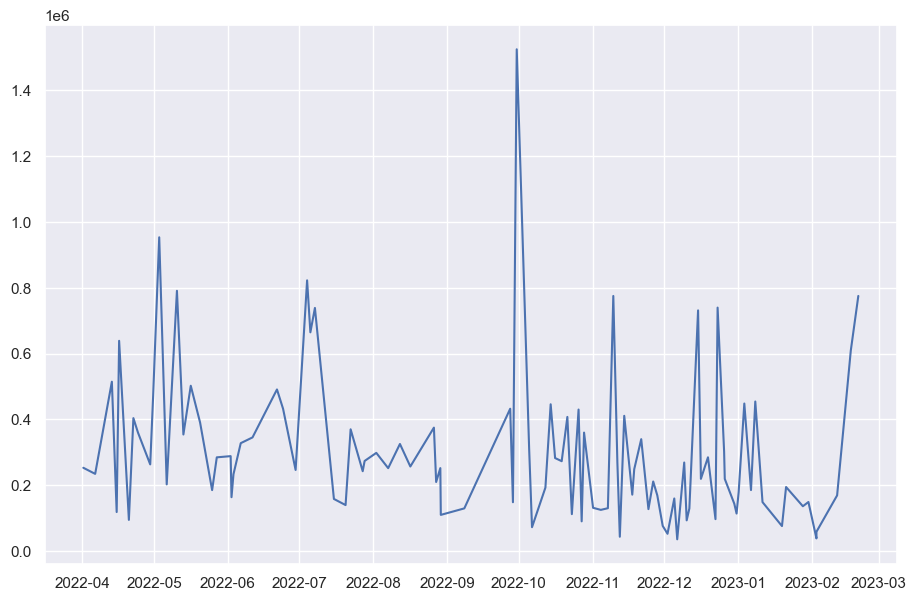

In [156]:
plt.rcParams['figure.figsize'] = (11, 7)

plt.plot(df_gsic_videos['uploaded_at'], df_gsic_videos['views_count'])

plt.show()

In [157]:
df_gsic_videos.loc[df_gsic_videos['uploaded_at'].dt.month == 2, ['video_id', 'views_count', 'uploaded_at']].sort_values(by='views_count', ascending=False)

,video_id,views_count,uploaded_at
0,ljP6X7gfNu8,775308,2023-02-20 08:11:34+00:00
1,rxeo-arlQd0,609524,2023-02-17 04:34:42+00:00
2,ZZfP4Si9nZk,169142,2023-02-11 10:45:02+00:00
3,pIiv6jd3TDE,58622,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,38521,2023-02-02 18:53:03+00:00


In [51]:
df_gsic_videos.loc[df_gsic_videos['uploaded_at'].dt.month != 9, ['video_id', 'views_count', 'uploaded_at']]

,video_id,views_count,uploaded_at
0,ljP6X7gfNu8,765798,2023-02-20 08:11:34+00:00
1,rxeo-arlQd0,606218,2023-02-17 04:34:42+00:00
2,ZZfP4Si9nZk,168363,2023-02-11 10:45:02+00:00
3,pIiv6jd3TDE,58482,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,38395,2023-02-02 18:53:03+00:00
...,...,...,...
95,PO5qOK3buzs,638941,2022-04-16 09:01:17+00:00
96,JGgNBWleyhY,118602,2022-04-15 08:22:51+00:00
97,SeDhLSNRqHc,514635,2022-04-13 08:00:06+00:00
98,XkBiWBbPT18,234571,2022-04-06 07:57:45+00:00


In [49]:
df_gsic_videos.sort_values(by='views_count', ascending=False)

,video_id,category_id,category_name,views_count,like_count,uploaded_at
54,T65PZXxD7tw,20,Gaming,1524766,39224,2022-09-30 02:30:13+00:00
89,afBygzscoo0,20,Gaming,953491,20431,2022-05-03 04:34:33+00:00
73,KNLI1x7bLVE,20,Gaming,822703,19951,2022-07-04 04:49:26+00:00
87,gTgGUEgbLLE,20,Gaming,790915,14468,2022-05-10 14:52:13+00:00
39,gqoWCzzcORg,20,Gaming,775200,12743,2022-11-09 14:24:49+00:00
...,...,...,...,...,...,...
3,pIiv6jd3TDE,20,Gaming,58482,528,2023-02-02 18:53:47+00:00
28,DLolSfWmEg0,20,Gaming,52477,867,2022-12-02 08:00:10+00:00
37,zrN-ybe49lg,20,Gaming,43532,1161,2022-11-12 08:00:34+00:00
4,DZ-q7Z730mc,20,Gaming,38395,477,2023-02-02 18:53:03+00:00


In [115]:
most_watched_video_9 = df_gsic_videos.loc[df_gsic_videos['uploaded_at'].dt.month == 9, ['video_id', 'views_count']].sort_values(by='views_count', ascending=False).values[0][0]
most_watched_video_9
gsic_best_comment_9 = df_gsic_comments.loc[df_gsic_comments['video_id'] == most_watched_video_9, ['video_id', 'comment', 'like_count', 'created_at']].sort_values(by='like_count', ascending=False)
gsic_best_comment_9

,video_id,comment,like_count,created_at
40330,T65PZXxD7tw,들어보니깐 이미 존재하고 있는 한국기업과 외국기업의 불평등을 해결하기 위해서라면 외...,7429,2022-09-30T03:22:08Z
40525,T65PZXxD7tw,망사용료법이 국익에 도움이 되니까 국민이 희생해야 한다는 21세기 전체주의 국가 대...,6115,2022-09-30T03:02:10Z
39604,T65PZXxD7tw,제발 꼭 국내 이통사의 패배를 간절히 바랍니다.,4777,2022-09-30T04:11:43Z
40610,T65PZXxD7tw,한국 대기업이란 것들은 전부 왜 이 꼬라지냐?,4233,2022-09-30T02:42:22Z
38833,T65PZXxD7tw,국내 이통사의 개수작이 반드시 좌절 되었으면 좋겠네요.,3852,2022-09-30T05:41:48Z
...,...,...,...,...
36683,T65PZXxD7tw,외국은 트윕 비트 잘만쓰는데 한국은 투네이션으로 개꿀빨고 수익은 수익대로안되서 런한...,0,2022-09-30T17:14:48Z
36680,T65PZXxD7tw,국회든 통신사든 애국이라는 슬로건 내놓고 지들 돈 어케하면 벌까 궁리만.........,0,2022-09-30T17:18:09Z
36679,T65PZXxD7tw,의원들 통신장사꾼들 진짜 부끄러운줄 알아라. 일제시대때 친일매국노랑 다를게 뭐냐. ...,0,2022-09-30T17:19:08Z
36677,T65PZXxD7tw,그냥 뭐좀 드셨나보네,0,2022-09-30T17:23:23Z


In [126]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import Preprocessing as prep

stopwords = prep.stopwords("C:/Users/TECH2_07/Desktop/이도원 프로젝트 폴더/자료/stopwords.txt", [])
stopwords

vect = CountVectorizer(tokenizer = lambda x: prep.text_cleaning(x, stopwords))
bow_vect = vect.fit_transform(gsic_best_comment_9['comment'])
bow_vect

<6559x7610 sparse matrix of type '<class 'numpy.int64'>'
	with 55975 stored elements in Compressed Sparse Row format>

In [155]:
shorts_bool = df_gsic_videos.title.str.contains('#shorts')

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at
3,pIiv6jd3TDE,20,Gaming,제이스 성우가 부자되는 법 남도형 #shorts,58622,530,2023-02-02 18:53:47+00:00
4,DZ-q7Z730mc,20,Gaming,제이스 잘하는 법: 우리 남도형 성우는 안 물어요 #shorts,38521,479,2023-02-02 18:53:03+00:00
16,hWQ5imsk3Tc,20,Gaming,웰메이드 똥겜 : 염소 시뮬레이터 #shorts,219356,3362,2022-12-26 08:09:39+00:00


### 침착맨

In [1]:
import pandas as pd
import Preprocessing as prep
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import Visualization as vis

warnings.filterwarnings('ignore')

plt.rc('font', family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (11, 8)

import re


df_chim_videos = pd.read_csv('./데이터/chim_videos.csv', encoding='utf-8', engine='python')
df_chim_comment = pd.read_csv('./데이터/chim_comments.csv', encoding='utf-8', engine='python')
df_chim_videos.rename(columns={'description' : "tags"}, inplace=True)
human_list = pd.read_table('../자료/chim_dict.txt', encoding='utf-8', engine='python', sep='\t')

df_chim_videos.uploaded_at = pd.to_datetime(df_chim_videos.uploaded_at)
df_chim_videos.tags = df_chim_videos.tags.apply(lambda x: prep.extract_tags(x, "#침착맨 "))
df_chim_videos.tags = df_chim_videos.tags.str.replace("#침착맨 ", "")

df_chim_comment.created_at = pd.to_datetime(df_chim_comment.created_at)
df_chim_comment.updated_at = pd.to_datetime(df_chim_comment.updated_at)
df_chim_videos

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,tags
0,7QnVBNbTVeM,24,Entertainment,궤도와 다시 하는 '지금 당장 있으면 좋을 과학 기술 월드컵',475920,6000,2023-02-26 10:00:04+00:00,#궤도 #이상형월드컵
1,j67xuAK_qz4,24,Entertainment,놀러 온 궤도의 돈고추라면,720061,8437,2023-02-25 10:00:22+00:00,#궤도 #쿡방
2,mhZBhpagdVU,24,Entertainment,롯데리아 전주 비빔라이스 버거,560399,6939,2023-02-24 10:00:35+00:00,#전주비빔라이스버거 #먹방
3,5ahN5s59M5I,24,Entertainment,한 달 늦은 뉴스 속보,549419,7394,2023-02-23 10:00:03+00:00,#뉴스
4,4DLCaQZ6VC4,24,Entertainment,시디즈 실전용 게이밍 의자 (a.k.a 교잡종),443958,4818,2023-02-22 10:00:02+00:00,#시디즈GCPRO #GCPRO #시디즈게이밍의자 #진짜게임을시작한당신에게 #그렇게게...
...,...,...,...,...,...,...,...,...
603,c5vbkLo_hwU,20,Gaming,【그림 판당고】 5화 - 뜬금없이 셀소에게 팩트폭격 (Grim Fandango),10411,36,2017-02-07 09:55:51+00:00,
604,RiIUt2HxLaU,20,Gaming,【히오스】 ★합방★ 신정민 해설의 특급 과외 3/7,16796,56,2016-10-09 10:22:39+00:00,
605,SPwUNX2k9rU,20,Gaming,PORTAL 1 | 제6화 ~끝~,12848,70,2016-06-15 09:06:28+00:00,
606,crMZPyYndcs,20,Gaming,[침착맨의 워킹데드] 시즌1 에피소드4-5 (The Walking Dead 1),13282,49,2016-06-11 09:25:20+00:00,


In [2]:
df_chim_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       608 non-null    object             
 1   category_id    608 non-null    int64              
 2   category_name  608 non-null    object             
 3   title          608 non-null    object             
 4   views_count    608 non-null    int64              
 5   like_count     608 non-null    int64              
 6   uploaded_at    608 non-null    datetime64[ns, UTC]
 7   tags           608 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 38.1+ KB


In [3]:
human_list_path = "../자료/chim_dict.txt"

most_hash_df = prep.most_used_tags_df(df_chim_videos).copy()
most_hash_df.tags = most_hash_df.tags.apply(lambda text: prep.extract_human_tags(text, df_chim_videos, human_list_path))
most_hash_df.head(4)


human_hash_df = df_chim_videos.copy()
human_hash_df.tags = human_hash_df.tags.apply(lambda text: prep.extract_human_tags(text, df_chim_videos, human_list_path))
human_hash_df.tags.value_counts()


new_df = human_hash_df.copy()

for idx, value in enumerate(new_df.tags.unique()):
    if value != "None":
        new_df = prep.automatize_human_hash_df(new_df, s_tag_name=value, w_tag_name=value, category_id=24)
    else:
        new_df = prep.automatize_human_hash_df(new_df, s_tag_name="None", w_tag_name="#None", category_id=24)


# new_df.drop(new_df.loc[new_df.tags == "#None"].index, inplace=True)


# for i in range(0, new_df.tags.nunique()):
#     new_df.at[i, 'tags'] = i

# new_df.tags = new_df.tags.astype(np.int64)

new_df.tags.value_counts()

#궤도              1
#None            1
#미노이             1
#승우아빠            1
#주호민 #김풍         1
#김풍 #임세모         1
#류준열 #박정민        1
#비비              1
#주호민 #통닭천사       1
#박지성 #배성재        1
#주호민 #주우재        1
#박정민             1
#카더가든            1
#김풍 #주호민 #주우재    1
#임세모             1
#최고민수 #김풍        1
#김준표 #주호민        1
#김풍 #주호민         1
#궤도 #김풍          1
#뉴진스 #주우재        1
#김풍              1
#카더가든 #비비        1
#주호민             1
#최고민수            1
#임용한             1
#남도형             1
#김풍 #심윤수         1
#배도라지            1
#주우재             1
#곽민수             1
#통닭천사            1
#김준표 #이은결        1
#양정무 #주호민        1
#피식대학 #박정민       1
#통닭천사 #김아랑       1
#주호민 #임세모        1
Name: tags, dtype: int64

In [6]:
prep.tags_list(df_chim_videos)[:10]

['#궤도',
 '#이상형월드컵',
 '#궤도',
 '#쿡방',
 '#전주비빔라이스버거',
 '#먹방',
 '#뉴스',
 '#시디즈GCPRO',
 '#GCPRO',
 '#시디즈게이밍의자']

In [7]:
most_used_tags = prep.most_used_tags_df(df_chim_videos)
(most_used_tags.tags.str.contains('주우재') == True).sum()

11

In [8]:
df_chim_videos.loc[df_chim_videos.tags.str.contains('주우재')].head(3)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,tags
47,cspfdOFcOsE,24,Entertainment,한국 좀비사태 발생시 필요한 현실능력 월드컵,1681759,11916,2023-01-10 10:00:29+00:00,#주우재 #좀비 #월드컵
51,SP-LJqVgQuw,24,Entertainment,[ENG] 뉴진스 초대석,3854841,58753,2023-01-05 10:00:10+00:00,#뉴진스 #주우재
53,RRnO-9xfJY8,24,Entertainment,많이 먹는 사람과 많이 먹기,1300589,13947,2023-01-03 10:00:21+00:00,#주우재 #먹방


In [10]:
prep.most_used_tags_list(df_chim_videos)[:5]

['', '#비비', '#GTA5', '#좀비', '#주우재']

In [11]:
prep.most_used_tags_df(df_chim_videos).head(3)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,tags
0,7QnVBNbTVeM,24,Entertainment,궤도와 다시 하는 '지금 당장 있으면 좋을 과학 기술 월드컵',475920,6000,2023-02-26 10:00:04+00:00,#궤도 #이상형월드컵
1,j67xuAK_qz4,24,Entertainment,놀러 온 궤도의 돈고추라면,720061,8437,2023-02-25 10:00:22+00:00,#궤도 #쿡방
2,mhZBhpagdVU,24,Entertainment,롯데리아 전주 비빔라이스 버거,560399,6939,2023-02-24 10:00:35+00:00,#전주비빔라이스버거 #먹방


In [12]:
prep.most_used_tags_df(df_chim_videos).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 415
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       413 non-null    object             
 1   category_id    413 non-null    int64              
 2   category_name  413 non-null    object             
 3   title          413 non-null    object             
 4   views_count    413 non-null    int64              
 5   like_count     413 non-null    int64              
 6   uploaded_at    413 non-null    datetime64[ns, UTC]
 7   tags           413 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 29.0+ KB


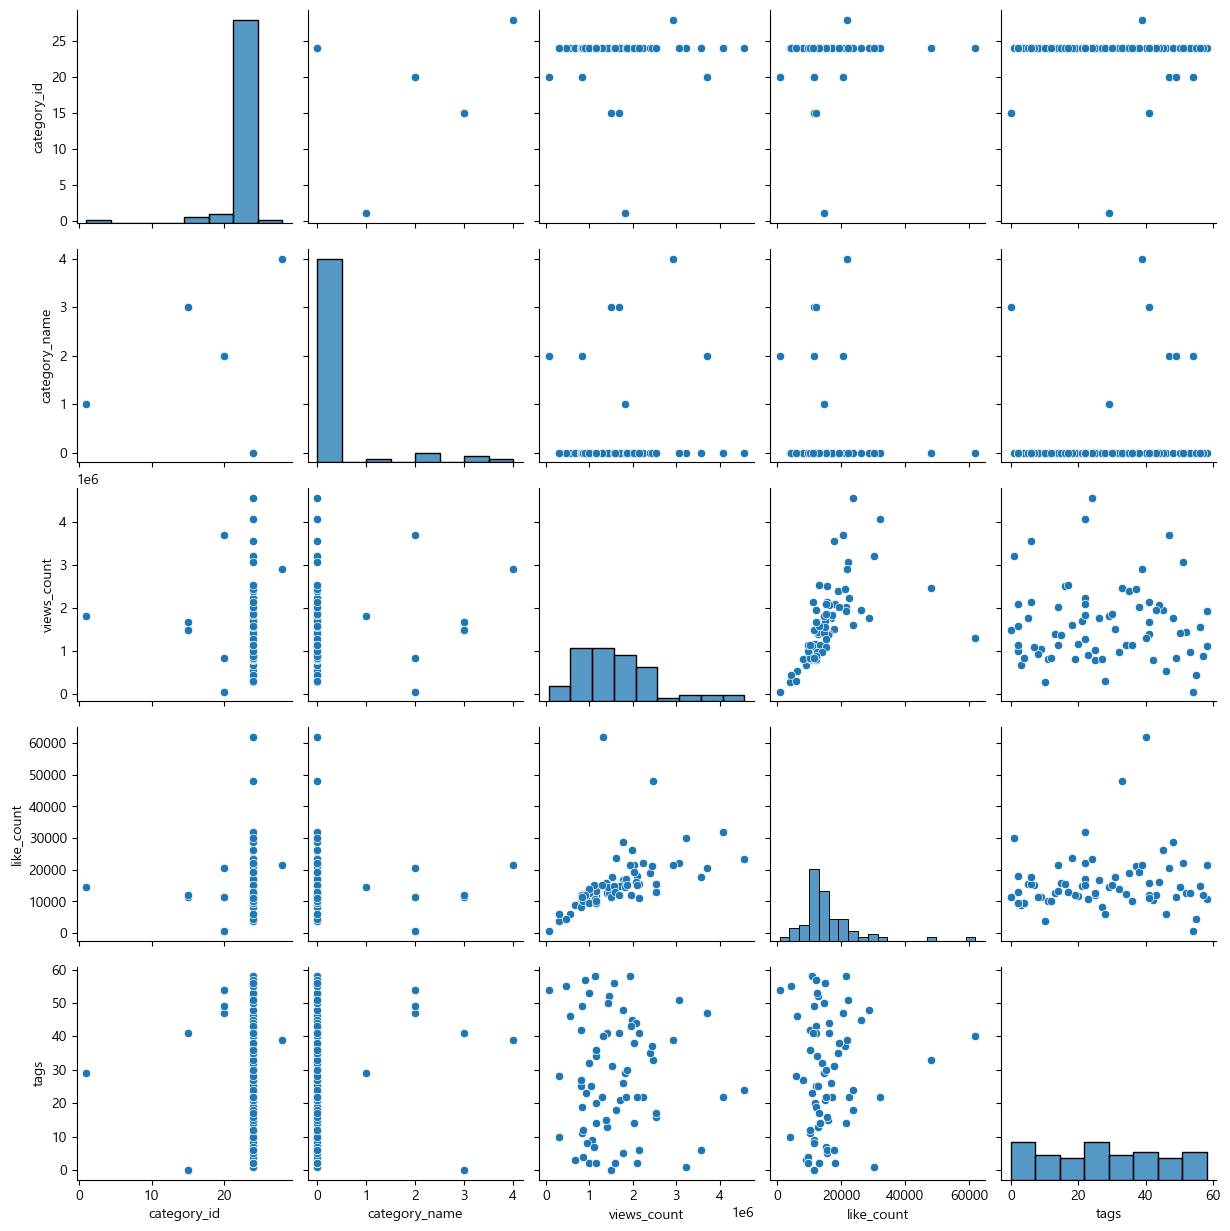

In [13]:
df_bool = (prep.most_used_tags_df(df_chim_videos).tags.str.contains('#주호민') == True)
plot_data = prep.most_used_tags_df(df_chim_videos).loc[df_bool]

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data = plot_data.copy()
data['category_name'] = encoder.fit_transform(plot_data[['category_name']])
data['tags'] = encoder.fit_transform(plot_data[['tags']])
data

sns.pairplot(data=data)
plt.show()

#### 시각화

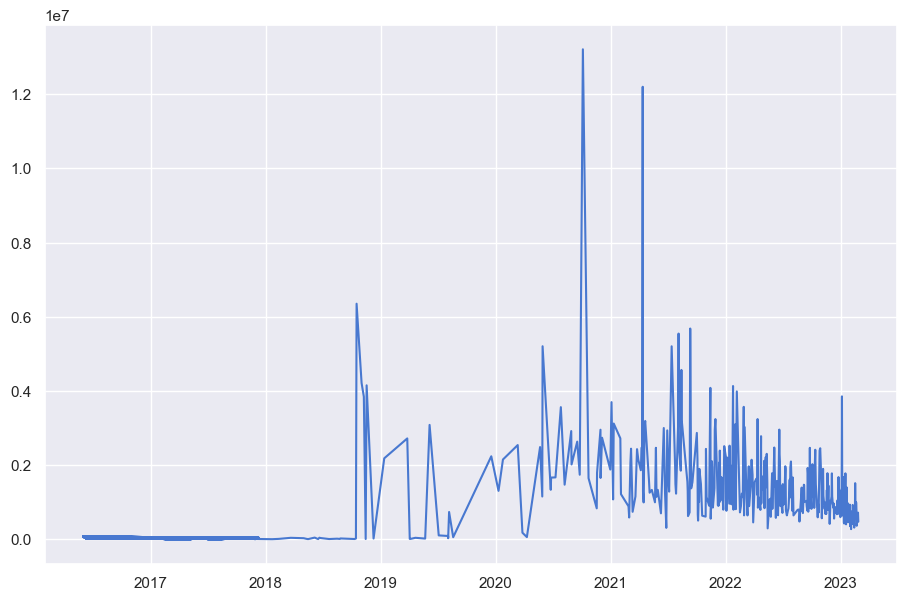

In [14]:
plt.rcParams['figure.figsize'] = (11, 7)
sns.set_theme(palette="muted")

plt.plot(df_chim_videos.uploaded_at, df_chim_videos.views_count)

plt.show()

In [15]:
none_hash_df = human_hash_df.loc[human_hash_df.tags == "None"]
joint_hash_df = human_hash_df.loc[human_hash_df.tags != "None"]
none_hash_df['origin_index'] = none_hash_df.index
joint_hash_df['origin_index'] = joint_hash_df.index
none_hash_df.head(2)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,tags,origin_index
2,mhZBhpagdVU,24,Entertainment,롯데리아 전주 비빔라이스 버거,560399,6939,2023-02-24 10:00:35+00:00,None,2
3,5ahN5s59M5I,24,Entertainment,한 달 늦은 뉴스 속보,549419,7394,2023-02-23 10:00:03+00:00,None,3


In [16]:
joint_hash_df.head(2)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,tags,origin_index
0,7QnVBNbTVeM,24,Entertainment,궤도와 다시 하는 '지금 당장 있으면 좋을 과학 기술 월드컵',475920,6000,2023-02-26 10:00:04+00:00,#궤도,0
1,j67xuAK_qz4,24,Entertainment,놀러 온 궤도의 돈고추라면,720061,8437,2023-02-25 10:00:22+00:00,#궤도,1


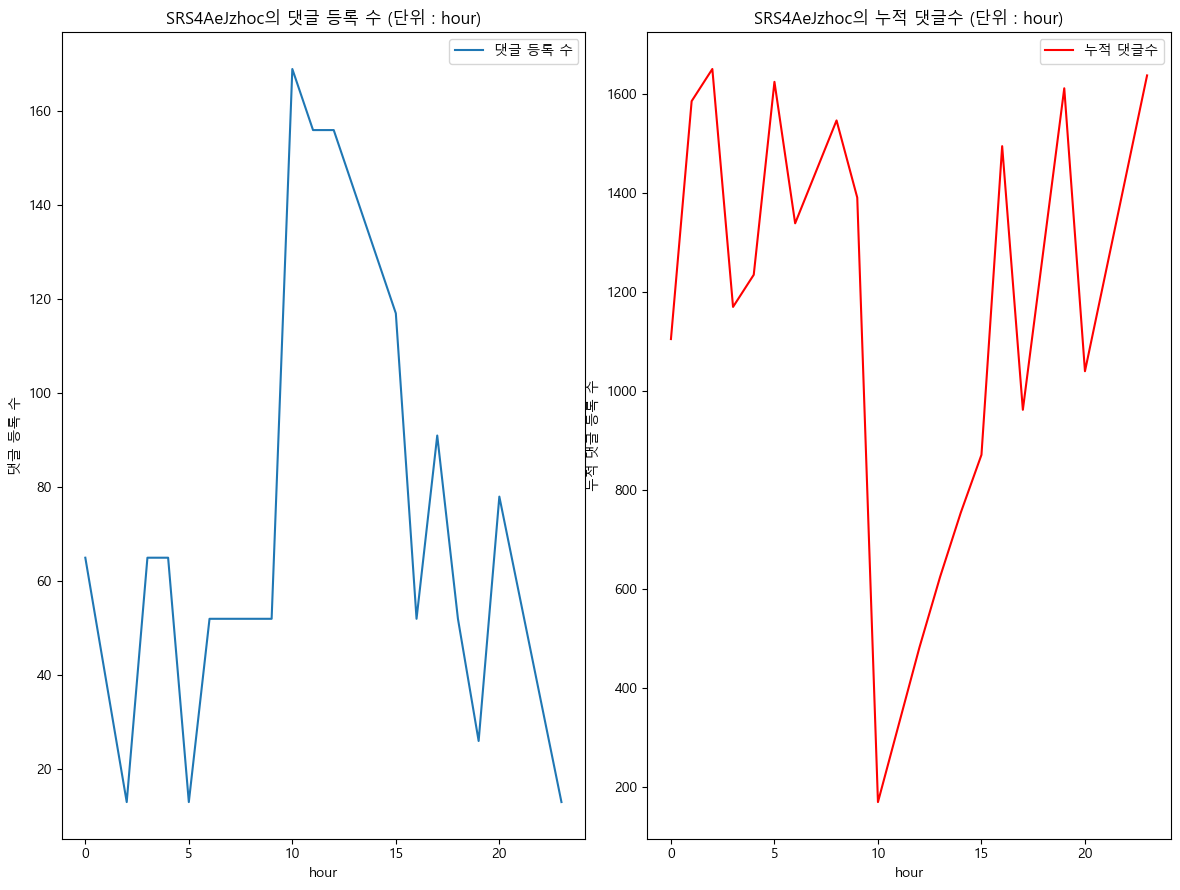

In [28]:
vis.appear_video_month_comment_count(df_chim_comment, "SRS4AeJzhoc", "hour", (12, 9))

In [25]:
df_chim_comment.created_at.dt.month.value_counts()

1     48252
12    33341
11    33238
10    32739
2     31961
6     30108
9     26195
7     25350
8     23221
5     21927
4     20299
3     19502
Name: created_at, dtype: int64

In [21]:
df_chim_comment.loc[df_chim_comment.video_id == "SRS4AeJzhoc"].created_at.dt.hour.unique()

array([ 6,  0, 17, 23, 15, 12,  3, 20, 13, 16, 14, 10, 11, 18,  8,  4,  9,
        1,  2, 19,  5,  7], dtype=int64)

SRS4AeJzhoc    13
zepg5v29XC4    13
oQIp8i1I7eM    13
CpN9a7h94yc    13
Y1-D0Gx_rb0    13
               ..
uwfgqZAZQoc     1
JD-TLZvNE9Q     1
e7Ary2grhNI     1
YLxRBicbGh4     1
aKKZpCOLYic     1
Name: video_id, Length: 413, dtype: int64

#### 결과물

##### 조회수 / 좋아요 수 관련

In [23]:
## 조회수 / 좋아요 수 관련 기술통계
df_chim_videos.views_count.sum() / len(df_chim_videos.views_count)

943264.0230263158

In [5]:
df_chim_videos

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,tags
0,7QnVBNbTVeM,24,Entertainment,궤도와 다시 하는 '지금 당장 있으면 좋을 과학 기술 월드컵',475920,6000,2023-02-26 10:00:04+00:00,#궤도 #이상형월드컵
1,j67xuAK_qz4,24,Entertainment,놀러 온 궤도의 돈고추라면,720061,8437,2023-02-25 10:00:22+00:00,#궤도 #쿡방
2,mhZBhpagdVU,24,Entertainment,롯데리아 전주 비빔라이스 버거,560399,6939,2023-02-24 10:00:35+00:00,#전주비빔라이스버거 #먹방
3,5ahN5s59M5I,24,Entertainment,한 달 늦은 뉴스 속보,549419,7394,2023-02-23 10:00:03+00:00,#뉴스
4,4DLCaQZ6VC4,24,Entertainment,시디즈 실전용 게이밍 의자 (a.k.a 교잡종),443958,4818,2023-02-22 10:00:02+00:00,#시디즈GCPRO #GCPRO #시디즈게이밍의자 #진짜게임을시작한당신에게 #그렇게게...
...,...,...,...,...,...,...,...,...
603,c5vbkLo_hwU,20,Gaming,【그림 판당고】 5화 - 뜬금없이 셀소에게 팩트폭격 (Grim Fandango),10411,36,2017-02-07 09:55:51+00:00,
604,RiIUt2HxLaU,20,Gaming,【히오스】 ★합방★ 신정민 해설의 특급 과외 3/7,16796,56,2016-10-09 10:22:39+00:00,
605,SPwUNX2k9rU,20,Gaming,PORTAL 1 | 제6화 ~끝~,12848,70,2016-06-15 09:06:28+00:00,
606,crMZPyYndcs,20,Gaming,[침착맨의 워킹데드] 시즌1 에피소드4-5 (The Walking Dead 1),13282,49,2016-06-11 09:25:20+00:00,


In [4]:
## 조회수 많은 영상 상위 5개
df_chim_videos.sort_values(by='views_count', ascending=False).head(5)

,video_id,category_id,category_name,title,views_count,like_count,uploaded_at,tags
343,hnanNlDbsE4,24,Entertainment,침착맨 삼국지 완전판,13213266,91279,2020-10-04 10:00:13+00:00,#침투부 #삼국지 #명절특선
319,Z7_WWJEj-j8,24,Entertainment,유사과학 월드컵 (이과답답주의),12202835,36501,2021-04-12 11:45:01+00:00,#유사과학 #이상형월드컵
381,9LQsLPsKRq8,24,Entertainment,【침vs펄 토론】 딱딱 복숭아 vs 물렁 복숭아 뭐가 더 맛있나?,6353339,52059,2018-10-16 13:00:04+00:00,
285,LOuy_4lrauM,24,Entertainment,쉽게 질리는 음식 월드컵,5684009,37257,2021-09-10 10:00:11+00:00,#이상형월드컵
294,Uepu0fO--9E,24,Entertainment,시청자 방 훈수하기,5548124,44453,2021-08-04 10:26:48+00:00,#침착맨


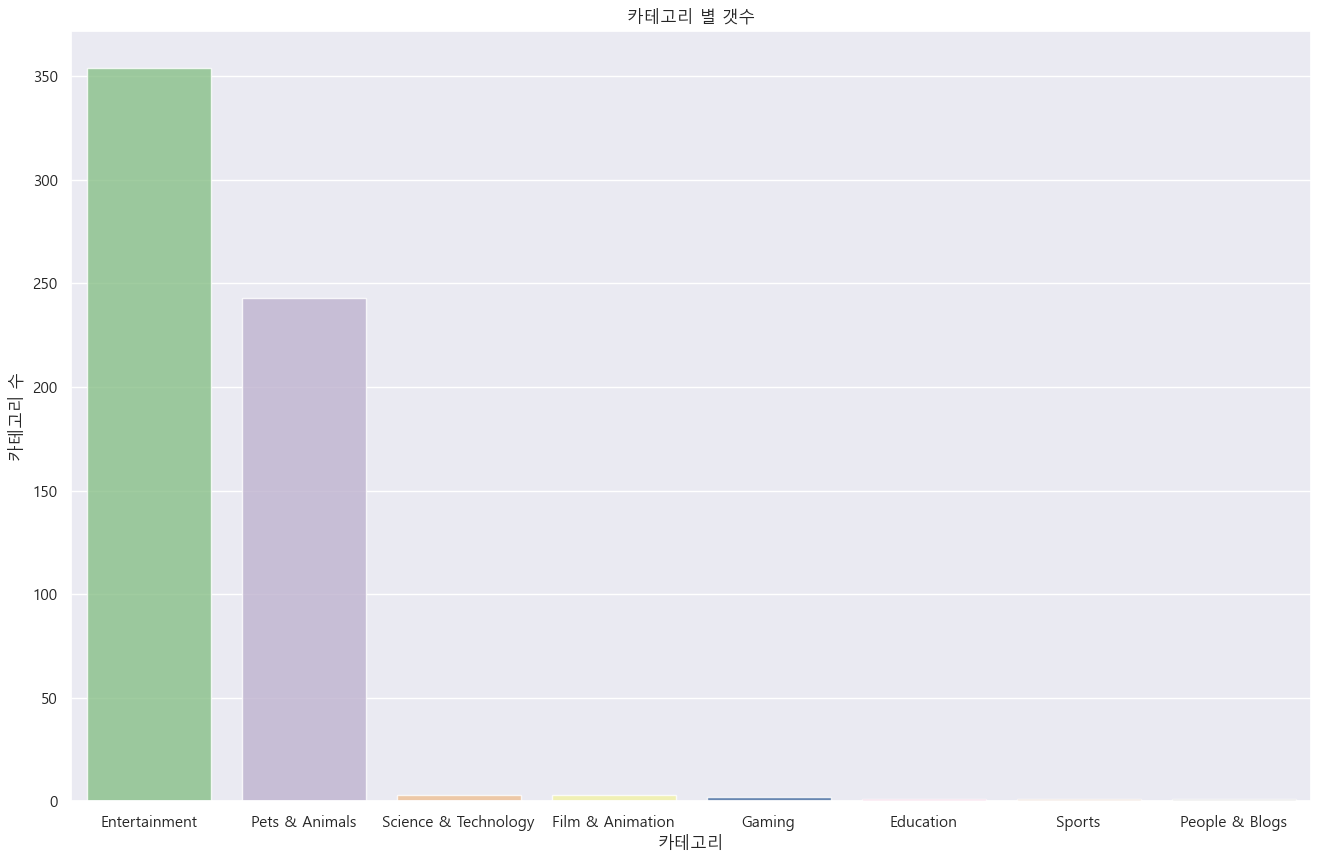

In [28]:
## 카테고리 별 갯수
x = df_chim_videos.category_name.unique()
y = df_chim_videos.category_name.value_counts().values
# sns.set_theme(palette="")

plt.figure(figsize=(16, 10))

sns.barplot(x=x, y=y, alpha=0.8, palette='Accent')
plt.xlabel('카테고리')
plt.ylabel('카테고리 수')
plt.title('카테고리 별 갯수')

plt.show()

In [ ]:
## 타 인플루언서의 출연이 조회수와 좋아요 수에 미치는 영향
new_df = human_hash_df.copy()

for idx, value in enumerate(new_df.tags.unique()):
    if value != "None":
        new_df = prep.automatize_human_hash_df(new_df, s_tag_name=value, w_tag_name=value, category_id=24)
    else:
        new_df = prep.automatize_human_hash_df(new_df, s_tag_name="None", w_tag_name="#None", category_id=24)


new_df.drop(new_df.loc[new_df.tags == "#None"].index, inplace=True)


for i in range(0, new_df.tags.nunique()+1):
    new_df.at[i, 'tags'] = i

new_df.tags = new_df.tags.astype(np.int64)

new_df.tags.value_counts()

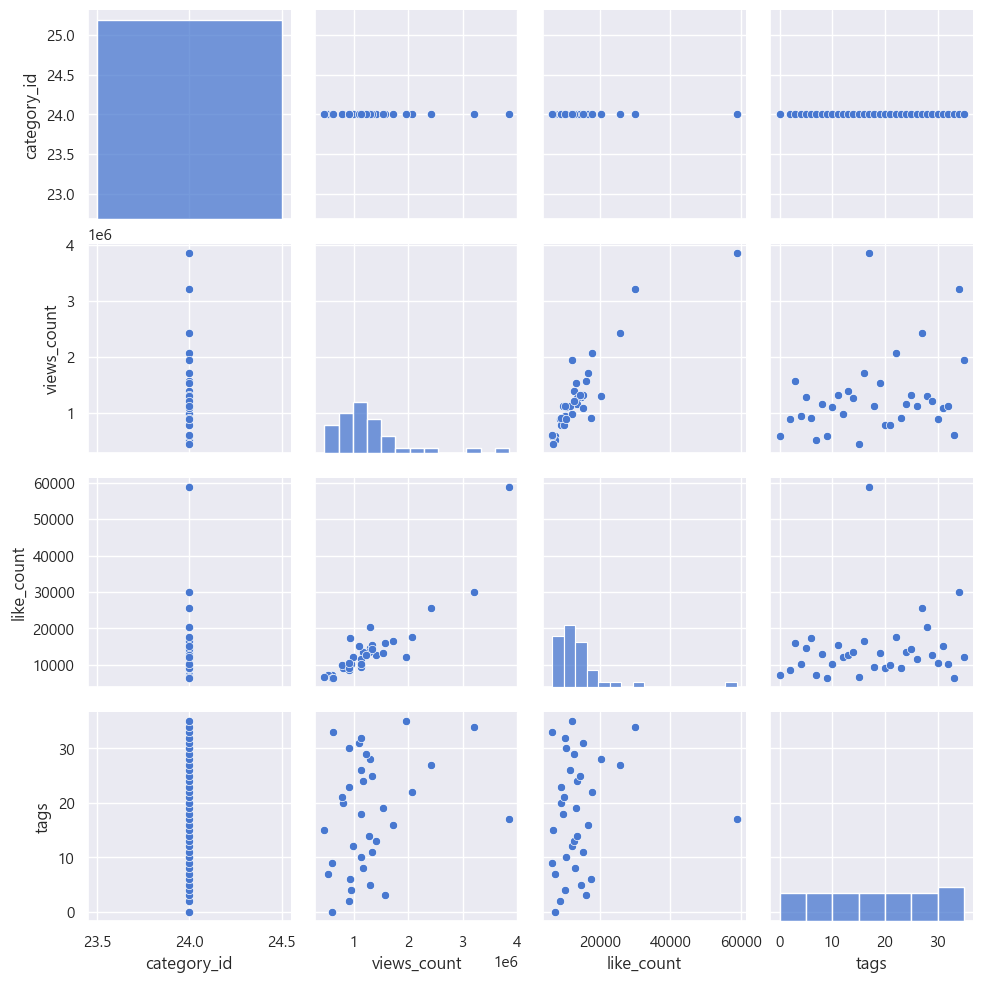

In [43]:
## 시각화
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_palette(palette="muted")

sns.pairplot(data=new_df)

plt.show()

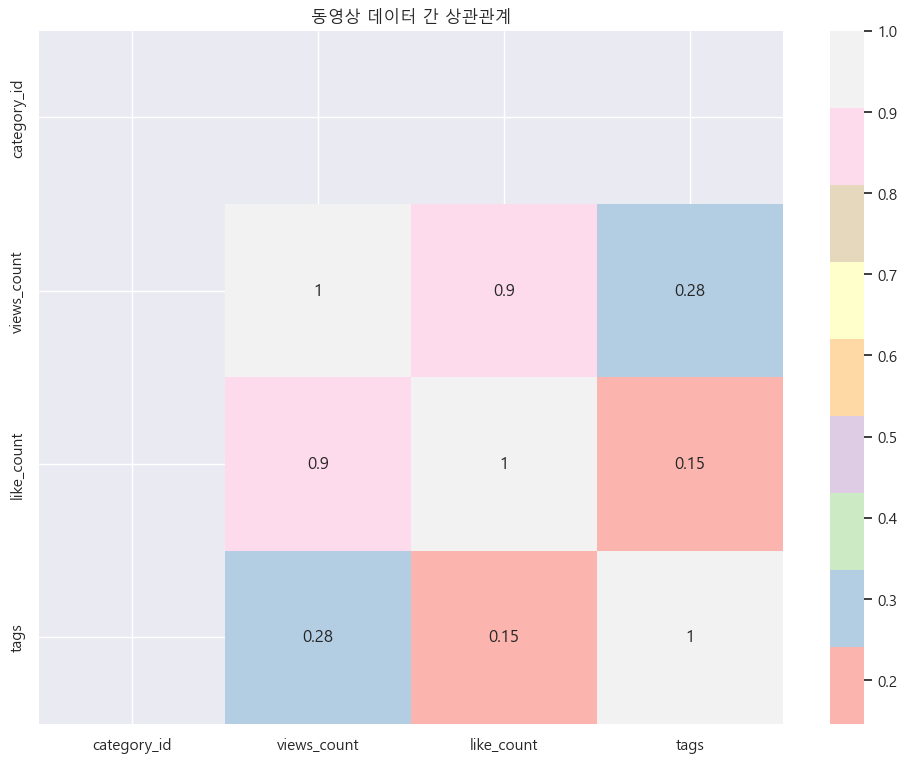

In [44]:
## 시각화
plt.rcParams['figure.figsize'] = (12, 9)

plt.title("동영상 데이터 간 상관관계")
sns.heatmap(new_df.corr(), annot=True, cmap="Pastel1")

plt.show()

In [5]:
stopwords = prep.stopwords("../자료/stopwords.txt")
stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [98]:
# video_id,  comment_id, comment, com_like_count
new_video_df = df_chim_videos.loc[:, ["video_id", ""]]

,video_id,comment_id,comment,like_count,created_at,updated_at
323120,IxaOybVE50Y,UgxlXok3jL-3pR2a6bl4AaABAg,아이에게 너무 심한 장난은 삼가하는 게 좋아요... 적당히 하셨으면 좋겠어요 소영님...,29933,2020-05-21T10:02:53Z,2020-05-21T10:02:53Z
341208,9LQsLPsKRq8,Ugxc1EF3sagqGUJhfix4AaABAg,물렁숭아측은 왜 본인이 나왔죠?,27240,2018-10-17T05:22:41Z,2018-10-17T05:22:41Z
305842,pkXiOnXAO90,UgzluX42JVZCHS2dv-14AaABAg,수십개월을 살아오신 소영박사님... 포켓몬학계를 빛내시고 3류 스트리머 방송에까지 ...,25316,2020-09-16T11:07:35Z,2020-09-16T11:07:35Z
304092,dV3d_e8GS-4,UgyXlDNT0mkJ4n3QcyZ4AaABAg,쏘영이가 사춘기 때 책가방이 아니라 지게를 메고 앞에 오면 그런갑다 하고 타시면 될...,23957,2020-09-24T10:02:21Z,2020-09-24T10:02:21Z
245023,keExg7xjO3o,UgyLnACZSrL-ourgpIB4AaABAg,이건 알바한테 누르면 300만원주는 버튼이라고 하고 하청주고 내가 700먹는게 최고인듯,18181,2021-08-03T10:25:41Z,2021-08-26T12:59:37Z
152434,llhcTERck_I,UgwC9_UJu1SDmAsqAMZ4AaABAg,침착맨님 제가 지난 과학특강 때 분명히 말씀을 드렸는데 자꾸 이러시면 저도 10시간...,18072,2022-04-28T10:23:56Z,2022-04-28T10:23:56Z
289241,53XqM_ofaKw,UgwooWM68_HWixMJlyN4AaABAg,솔직히 아빠가 저렇게 몸으로 놀아주면 개 재밌음ㅋㅋㅋㅋㅋ 저렇게 가벼울 때 말고 언...,18000,2020-12-04T10:01:52Z,2020-12-04T10:01:52Z
225596,_5Jsp-bIeqU,Ugxt1aA1fxw1-CVxzAh4AaABAg,자네가 스포한건 괜찮고......?,17209,2021-10-02T10:00:46Z,2021-10-02T10:00:46Z
302280,hnanNlDbsE4,UgxKMh91FyIqoJJaR8d4AaABAg,"오늘도 자려고 튼 당신, 평안한 밤 되십시오",16895,2021-01-24T16:52:12Z,2021-01-24T16:52:12Z
35142,SP-LJqVgQuw,UgxjPdB-StwscMJB-xh4AaABAg,이건 진짜 안절부절 못하면서 손에 땀을 쥐고 라이브로 봐야됨,16524,2023-01-05T10:01:12Z,2023-01-05T10:01:12Z


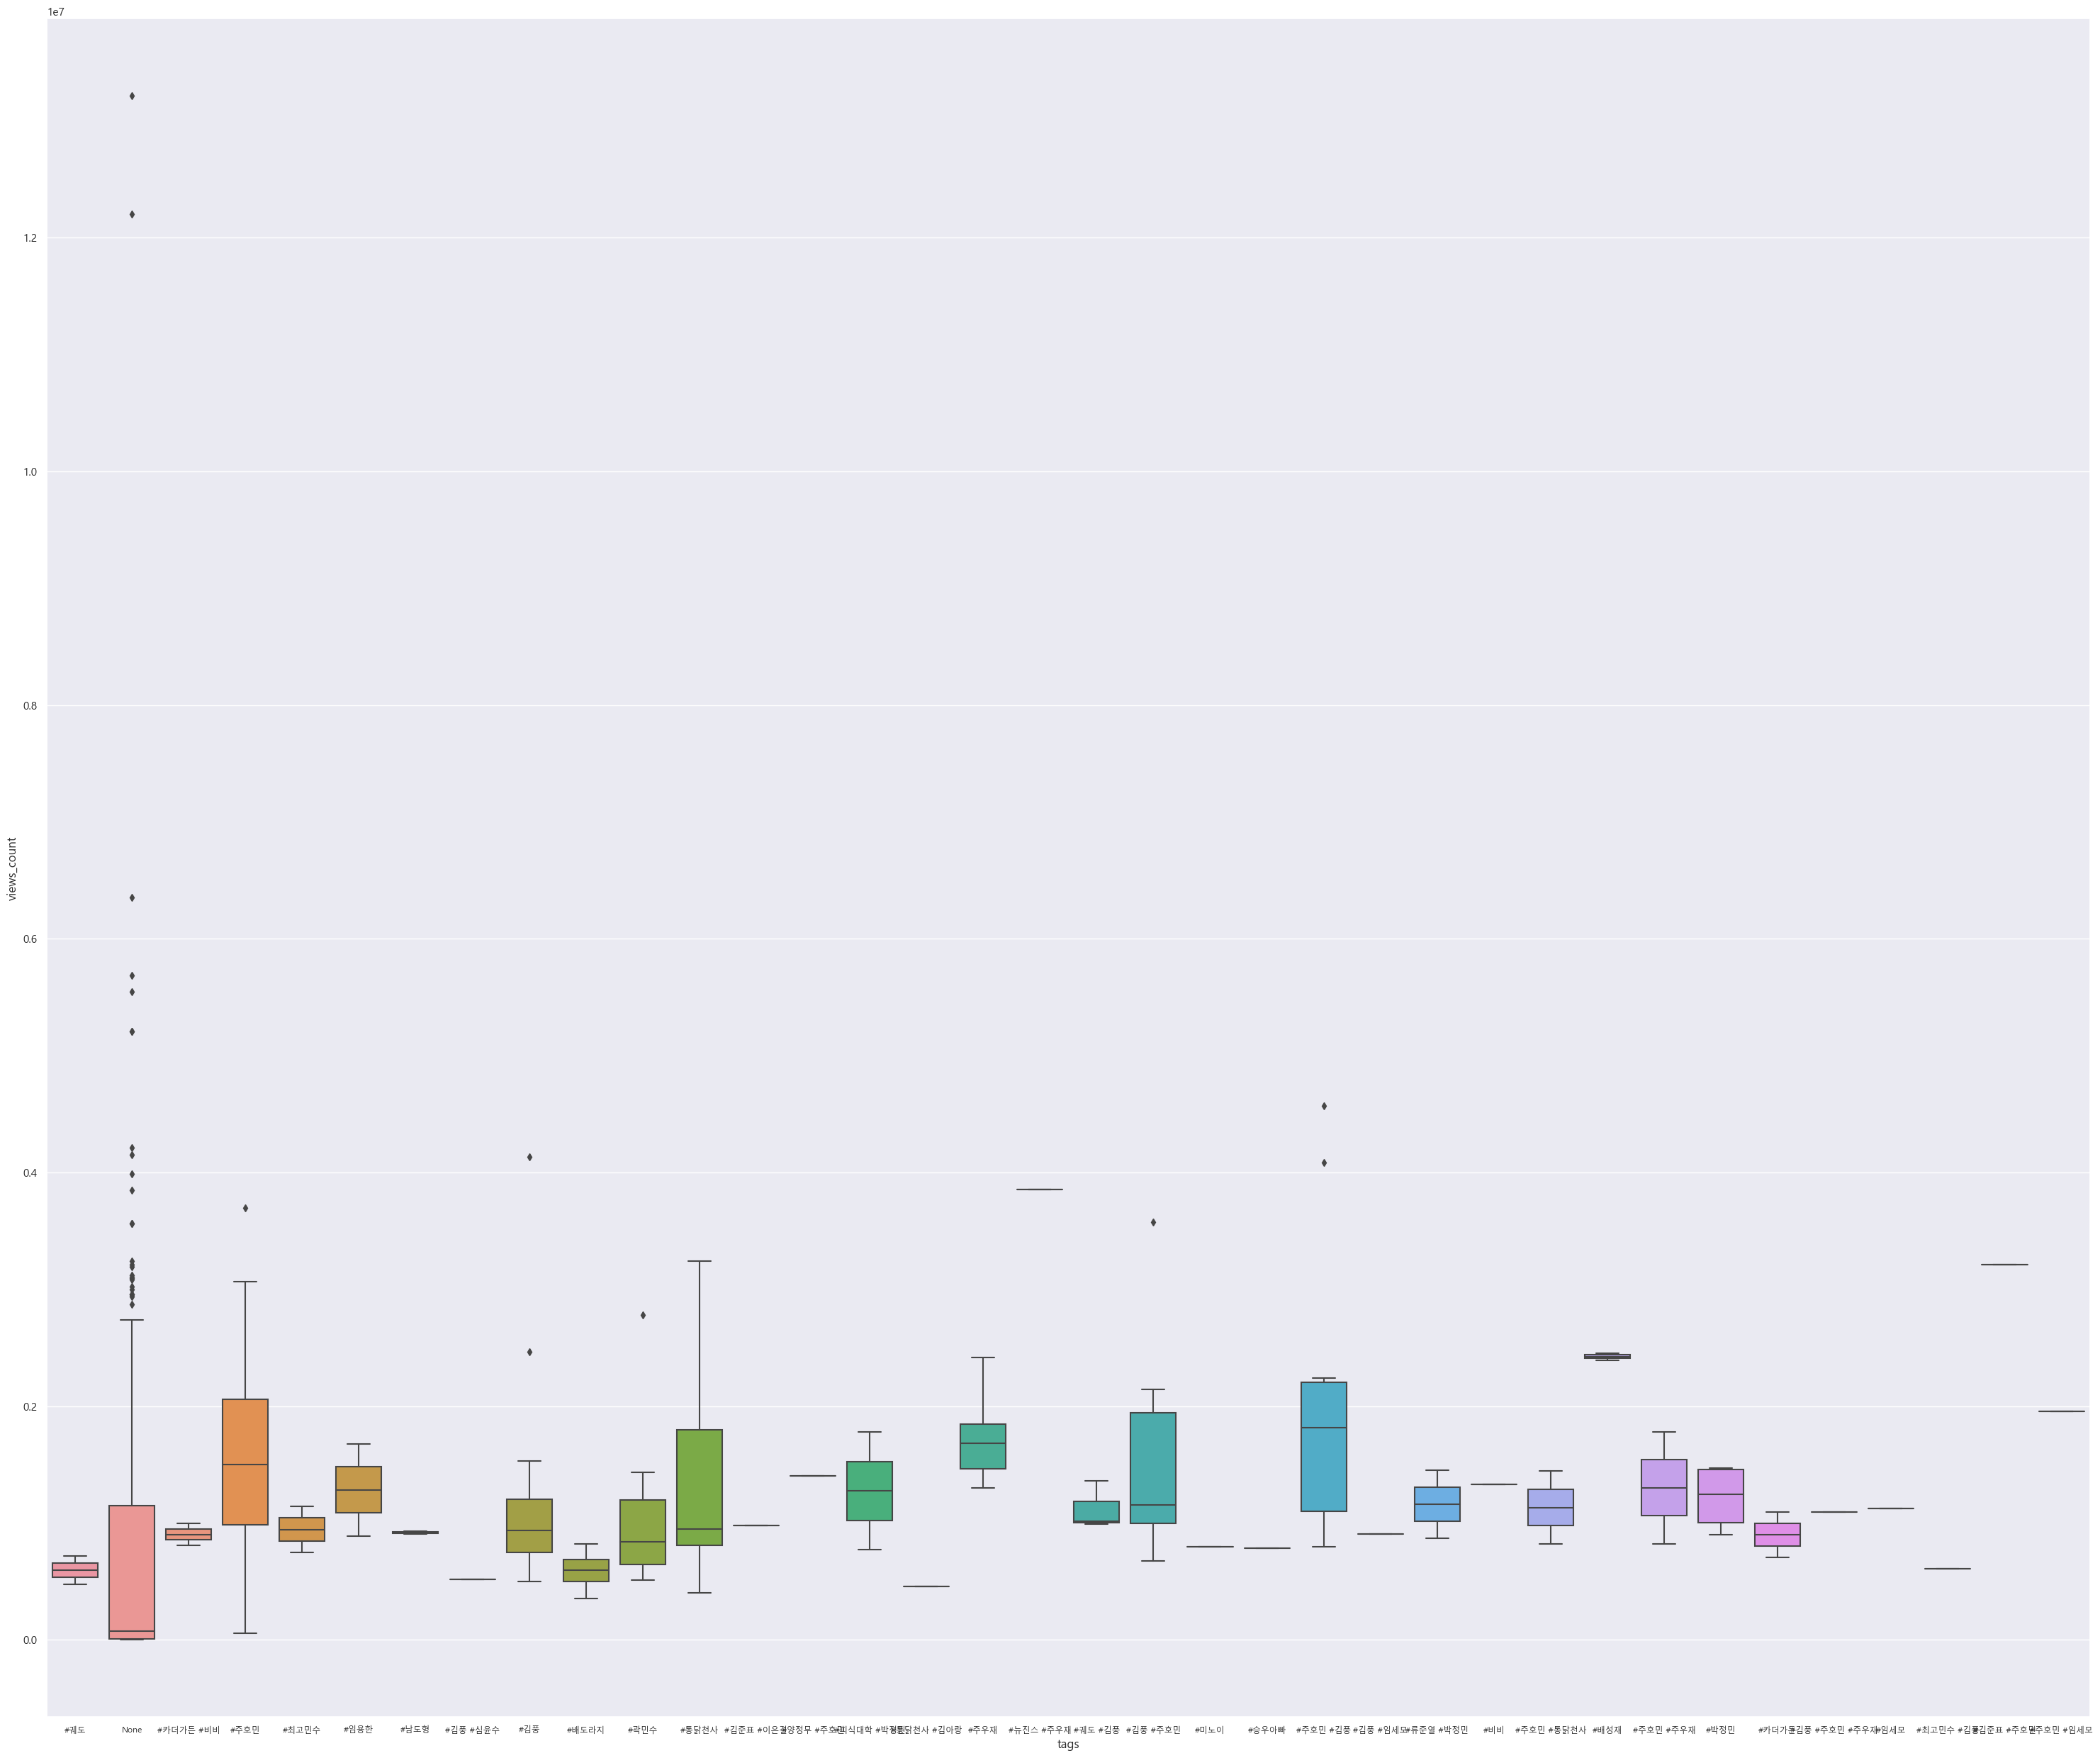

In [14]:
# 합방과 논-합방의 조회수, 좋아요 수 차이
none_hash_df = human_hash_df.loc[human_hash_df.tags == "None"]
joint_hash_df = human_hash_df.loc[human_hash_df.tags != "None"]
none_hash_df['origin_index'] = none_hash_df.index
joint_hash_df['origin_index'] = joint_hash_df.index

vis.show_boxplot(human_hash_df, ("tags", "views_count"), (30, 25))

In [22]:
## t-test
print(f"혼자 진행한 방송의 조회수 평균 : {np.mean(none_hash_df.views_count)}")
print(f"혼자 진행한 방송의 조회수 표준편차 : {np.std(none_hash_df.views_count)}")
print(f"합방을 한 방송의 조회수 평균 : {np.mean(joint_hash_df.views_count)}")
print(f"합방을 한 방송의 조회수 표준편차 : {np.std(joint_hash_df.views_count)}\n")


print(f"혼자 진행한 방송의 좋아요 수 평균 : {np.mean(none_hash_df.like_count)}")
print(f"혼자 진행한 방송의 좋아요 수 표준편차 : {np.std(none_hash_df.like_count)}")
print(f"합방을 한 방송의 좋아요 수 평균 : {np.mean(joint_hash_df.like_count)}")
print(f"합방을 한 방송의 좋아요 수 표준편차 : {np.std(joint_hash_df.like_count)}")

혼자 진행한 방송의 조회수 평균 : 781573.7633928572
혼자 진행한 방송의 조회수 표준편차 : 1314512.737903984
합방을 한 방송의 조회수 평균 : 1395996.75
합방을 한 방송의 조회수 표준편차 : 815972.1885113028

혼자 진행한 방송의 좋아요 수 평균 : 6912.582589285715
혼자 진행한 방송의 좋아요 수 표준편차 : 9699.854714364858
합방을 한 방송의 좋아요 수 평균 : 14383.01875
합방을 한 방송의 좋아요 수 표준편차 : 8440.722199900814


In [45]:
from scipy import stats

none_views_data = none_hash_df.views_count.values
joint_views_data = joint_hash_df.views_count.values

# 결과 : statistic=-3.9156149598164864, pvalue=0.00016673511207220158
# 해석 : 이 statistic이 우연히 나왔을 확률 => 0.00016673511207220158
stats.ttest_ind(none_views_data, joint_views_data)

Ttest_indResult(statistic=-5.534134090343868, pvalue=4.660017653024497e-08)

In [46]:
views_data_t_stats = format(stats.ttest_ind(none_views_data, joint_views_data)[0], ".5f")
views_data_p_value = format(stats.ttest_ind(none_views_data, joint_views_data)[1], ".5f")
print(f'조회수의 t 통계량 : {views_data_t_stats}')
print(f'조회수의 P-Value : {views_data_p_value}')

조회수의 t 통계량 : -5.53413
조회수의 P-Value : 0.00000


In [49]:
stats.ttest_ind(none_views_data, joint_views_data)

Ttest_indResult(statistic=-5.534134090343868, pvalue=4.660017653024497e-08)

##### 댓글 관련

In [13]:
## 기술통계
df_gsic_comments.shape

(71685, 6)

In [14]:
df_gsic_comments.head(3)

,video_id,comment_id,comment,like_count,created_at,updated_at
0,ljP6X7gfNu8,Ugz5zYEB342yAGPfy0x4AaABAg,리부트에서 하루1재획씩 반년동안 꾸준히하면서 상의 스타포스만 했는데 22성 한번도 ...,1,2023-02-23 01:42:39+00:00,2023-02-23 01:42:39+00:00
1,ljP6X7gfNu8,UgyslPz6vHxf5IzAHZ54AaABAg,그니까 결국 메이플이 돈독올라서 최근 출시되는 캐쉬템들을 착용 시 교불템으로 출시해...,0,2023-02-23 01:39:05+00:00,2023-02-23 01:39:05+00:00
2,ljP6X7gfNu8,UgzyoEJNZHqCe6qGlFh4AaABAg,큐브 논란 있을때 다 팔고 로아로 넘어간게 크네 기존 유저는 무한 데자뷰네 ㅋㅋ,0,2023-02-23 01:33:06+00:00,2023-02-23 01:33:06+00:00


In [15]:
df_gsic_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71685 entries, 0 to 71685
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   video_id    71685 non-null  object             
 1   comment_id  71685 non-null  object             
 2   comment     71685 non-null  object             
 3   like_count  71685 non-null  int64              
 4   created_at  71685 non-null  datetime64[ns, UTC]
 5   updated_at  71685 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
# 명사 형태소 추출
# 4분 50초 걸림. [우리집 기준]
df_comments_sep = df_chim_comment.copy()
df_comments_sep.comment = df_comments_sep.comment.apply(lambda x: prep.text_cleaning(x, stopwords="../자료/stopwords.txt"))
df_comments_sep.comment = df_comments_sep.comment.apply(lambda x : " ".join(x))
df_comments_sep

,video_id,comment_id,comment,like_count,created_at,updated_at
0,7QnVBNbTVeM,Ugzmf2KCLNfGMvjOAIx4AaABAg,소리 소리 만남,0,2023-02-27 06:21:37+00:00,2023-02-27 06:21:37+00:00
1,7QnVBNbTVeM,UgwcByZZhnHLQtFb_od4AaABAg,방장 왜케,0,2023-02-27 06:19:49+00:00,2023-02-27 06:19:49+00:00
2,7QnVBNbTVeM,UgzK43w3es4_sUES3-p4AaABAg,오늘 영상 요약 안드로이드 전기 아아 필립딕 선생 선생 예상,0,2023-02-27 06:01:43+00:00,2023-02-27 06:01:43+00:00
3,7QnVBNbTVeM,UgwTAaUHneZhtpK_LVZ4AaABAg,궤도 기계,0,2023-02-27 05:55:00+00:00,2023-02-27 05:55:00+00:00
4,7QnVBNbTVeM,Ugxs2qGT1LRd1z0gb9Z4AaABAg,월드컵 특강,0,2023-02-27 05:53:29+00:00,2023-02-27 05:53:29+00:00
...,...,...,...,...,...,...
346128,SRS4AeJzhoc,UghVMiKNyVyI6HgCoAEC,게임 피지 답답,0,2016-05-31 10:57:36+00:00,2016-05-31 10:57:36+00:00
346129,SRS4AeJzhoc,Ugg8ahjVX6z-13gCoAEC,초반 설명 웰케,0,2016-05-31 10:39:53+00:00,2016-05-31 10:39:53+00:00
346130,SRS4AeJzhoc,UgjYCSAFu6wUQ3gCoAEC,침하,0,2016-05-31 10:39:45+00:00,2016-05-31 10:39:45+00:00
346131,SRS4AeJzhoc,UggPw6PSvwpGGngCoAEC,이제,0,2016-05-31 10:36:26+00:00,2016-05-31 10:36:26+00:00


In [10]:
# 지워도 될?듯?
df_comments_sep.video_id.value_counts()

hnanNlDbsE4    8998
4k48gvdAsFY    4433
CEDzUn9pOG0    4330
NjLqAv5Mc8s    3976
keExg7xjO3o    3878
               ... 
vxpXec4znoA      13
7GCAtbg8u-o      11
qEqpQbv46oA       9
qGTVxVJcqH4       9
HzvCW1nsN3U       3
Name: video_id, Length: 413, dtype: int64

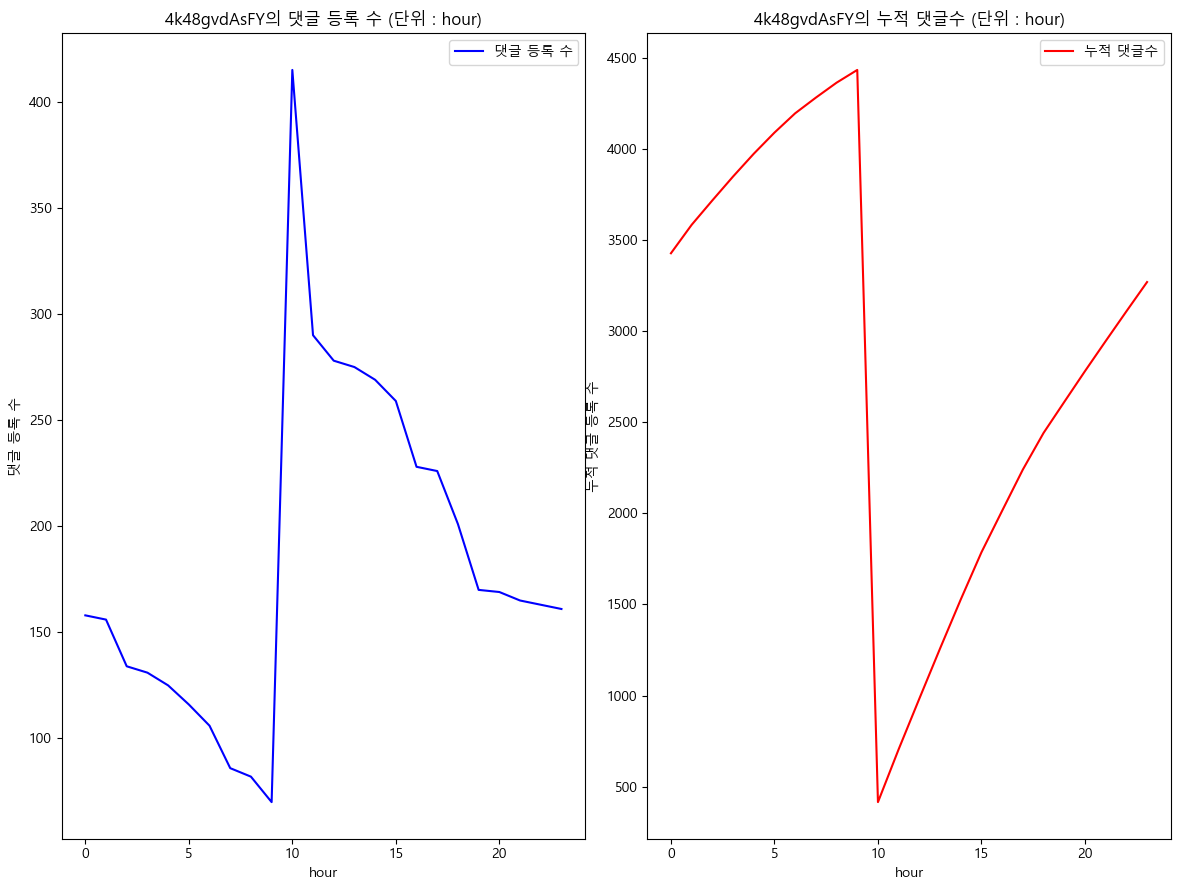

In [17]:
plt.rc('font', family='Malgun Gothic')

vis.appear_video_month_comment_count(df_comments_sep, "4k48gvdAsFY", t_stand="hour")

In [381]:
x

array([ 9, 10, 11, 12,  1], dtype=int64)

In [382]:
y

[4163, 2312, 65, 14, 5]

## 실험

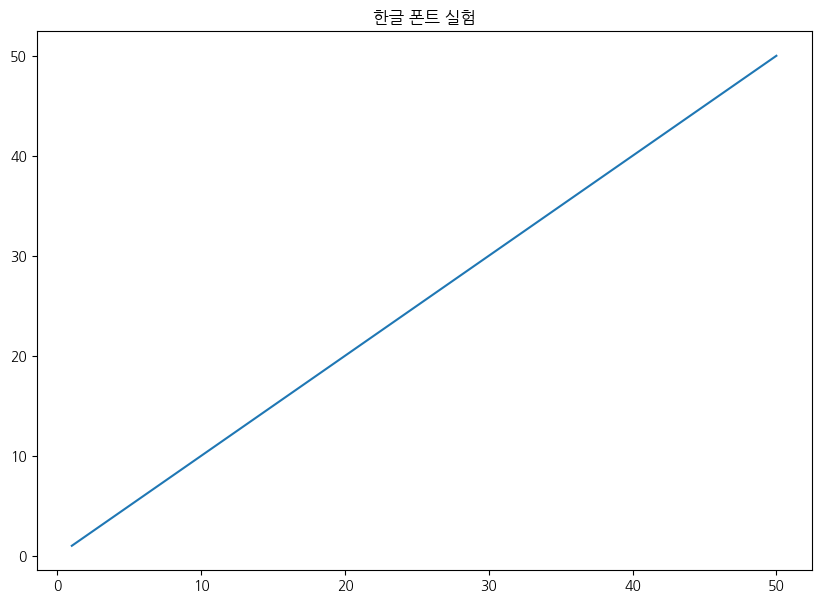